# 音源編集

### ライブラリのimport

In [10]:
# %load formant
import pandas as pd
import scipy.io.wavfile
import scipy.signal
import pylab as P
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from levinson_durbin import autocorr, LevinsonDurbin
import audioop
from memory_profiler import profile
import struct

## ステレオからモノラルに変換

In [81]:
r_path_st = "./vocals/umberella/r_short_st.wav"
t_path_st = "./vocals/umberella/t_short_st.wav"
r_path = "./vocals/umberella/r_short.wav"
t_path = "./vocals/umberella/t_short.wav"

r_ref_path_st = "./vocals/umberella/r_ref_st.wav"
t_ref_path_st = "./vocals/umberella/t_ref_st.wav"
r_ref_path = "./vocals/umberella/r_ref.wav"
t_ref_path = "./vocals/umberella/t_ref.wav"

r_test_path_st = "./vocals/umberella/r_test_st.wav"
t_test_path_st = "./vocals/umberella/t_test_st.wav"
r_test_path = "./vocals/umberella/r_test.wav"
t_test_path = "./vocals/umberella/t_test.wav"

In [3]:
# from pydub import AudioSegment
# sound = AudioSegment.from_wav(r_path_st)
# sound = sound.set_channels(1)
# sound.export(r_path, format="wav")
# sound = AudioSegment.from_wav(t_path_st)
# sound = sound.set_channels(1)
# sound.export(t_path, format="wav")

In [14]:
# from pydub import AudioSegment
# sound = AudioSegment.from_wav(r_ref_path_st)
# sound = sound.set_channels(1)
# sound.export(r_ref_path, format="wav")
# sound = AudioSegment.from_wav(t_ref_path_st)
# sound = sound.set_channels(1)
# sound.export(t_ref_path, format="wav")

/Users/sotobenjamin/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='./vocals/umberella/t_ref.wav'>

In [82]:
from pydub import AudioSegment
sound = AudioSegment.from_wav(r_test_path_st)
sound = sound.set_channels(1)
sound.export(r_test_path, format="wav")
sound = AudioSegment.from_wav(t_test_path_st)
sound = sound.set_channels(1)
sound.export(t_test_path, format="wav")

<_io.BufferedRandom name='./vocals/umberella/t_test.wav'>

## お尻の無音区間を消去

### trainデータから

In [4]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

#ファイルの読み込み
sample_wave_file="./vocals/umberella/r_short.wav"
wav=wave.open(sample_wave_file)
data=wav.readframes(wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
print("data.shape:",data.shape)

#dataを再生する
sd.play(data,wav.getframerate())
print("再生開始")
#再生が終わるまで待つ
status = sd.wait()

data.shape: (262144,)
再生開始


サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  262144
チャンネル数:  1
data.shape: (262144,)


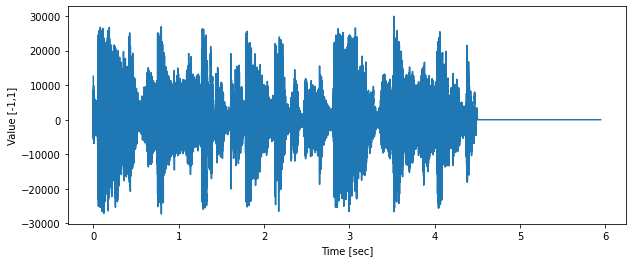

In [5]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

r_path="./vocals/umberella/r_short.wav"
#ファイルを読み込む
r_wav=wave.open(r_path)

#ファイルの情報を出力する
print("サンプリング周波数[Hz]: ",r_wav.getframerate()) 
print("サンプルサイズ[Byte]: ", r_wav.getsampwidth())
print("サンプル数: ",r_wav.getnframes()) 
print("チャンネル数: ",r_wav.getnchannels()) 

#PCM形式の波形データを読み込み
data=r_wav.readframes(r_wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
# data=data/np.iinfo(np.int16).max
print("data.shape:",data.shape)
r_wav.close()

#x軸の値
x=np.array(range(r_wav.getnframes()))/r_wav.getframerate()
# print("wav.getnframes():",wav.getnframes())
# print("wav.getframerate():",wav.getframerate())
# print("x.shape:",x.shape)

#音声データをプロットする
plt.figure(figsize=(10,4))
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1,1]")
plt.plot(x,data)
plt.show()

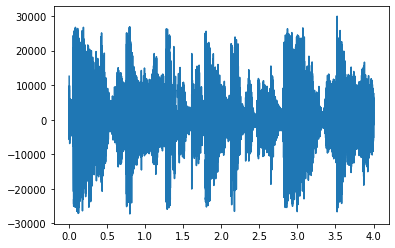

In [6]:
r_x3=np.array(range(r_wav.getframerate()*4))/r_wav.getframerate()
r_data3 = data[:r_wav.getframerate()*4]

plt.plot(r_x3,r_data3)
plt.show()

In [20]:
# 一回だけ実行

# # 4秒分に相当するフレーム数を算出
# time = 4
# r_ch = r_wav.getnchannels()
# r_width = r_wav.getsampwidth()
# r_fr = r_wav.getframerate()
# r_fn = r_wav.getnframes()

# frames = int(r_ch * r_fr * time)

# print("サンプリング周波数[Hz]: ",r_fr) 
# print("サンプルサイズ[Byte]: ", r_width)
# print("サンプル数: ",r_fn) 
# print("チャンネル数: ",r_ch)

# # 出力データを生成
# r_path3 = "./vocals/umberella/r_short3.wav"

# outd = struct.pack("h" * len(r_data3),* r_data3)

# # 書き出し
# ww = wave.open(r_path3, 'w')
# ww.setnchannels(r_ch)
# ww.setsampwidth(r_width)
# ww.setframerate(r_fr)
# ww.writeframes(outd)
# ww.close()

In [16]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

#ファイルの読み込み
sample_wave_file="./vocals/umberella/t_ref.wav"
wav=wave.open(sample_wave_file)
data=wav.readframes(wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
print("data.shape:",data.shape)

#dataを再生する
sd.play(data,wav.getframerate())
print("再生開始")
#再生が終わるまで待つ
status = sd.wait()

data.shape: (262144,)
再生開始


サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  262144
チャンネル数:  1
data.shape: (262144,)


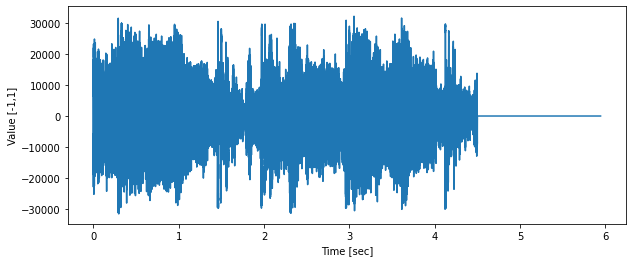

In [8]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

t_path="./vocals/umberella/t_short.wav"
#ファイルを読み込む
t_wav=wave.open(t_path)

#ファイルの情報を出力する
print("サンプリング周波数[Hz]: ",t_wav.getframerate()) 
print("サンプルサイズ[Byte]: ", t_wav.getsampwidth())
print("サンプル数: ",t_wav.getnframes()) 
print("チャンネル数: ",t_wav.getnchannels()) 

#PCM形式の波形データを読み込み
data=t_wav.readframes(t_wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
# data=data/np.iinfo(np.int16).max
print("data.shape:",data.shape)
t_wav.close()

#x軸の値
x=np.array(range(t_wav.getnframes()))/t_wav.getframerate()
# print("wav.getnframes():",wav.getnframes())
# print("wav.getframerate():",wav.getframerate())
# print("x.shape:",x.shape)

#音声データをプロットする
plt.figure(figsize=(10,4))
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1,1]")
plt.plot(x,data)
plt.show()

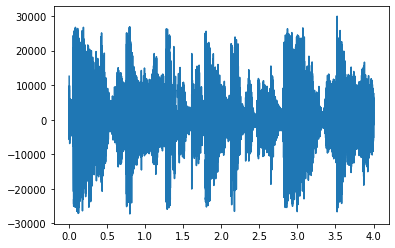

In [9]:
t_x3=np.array(range(t_wav.getframerate()*4))/t_wav.getframerate()
t_data3 = data[:t_wav.getframerate()*4]

plt.plot(t_x3,r_data3)
plt.show()

In [7]:
# 一回だけ実行

# # 4秒分に相当するフレーム数を算出
# time = 4
# t_ch = t_wav.getnchannels()
# t_width = t_wav.getsampwidth()
# t_fr = t_wav.getframerate()
# t_fn = t_wav.getnframes()

# frames = int(t_ch * t_fr * time)

# print("サンプリング周波数[Hz]: ",t_fr) 
# print("サンプルサイズ[Byte]: ", t_width)
# print("サンプル数: ",t_fn) 
# print("チャンネル数: ",t_ch)

# # 出力データを生成
# t_path3 = "./vocals/umberella/t_short3.wav"

# outd = struct.pack("h" * len(t_data3),* t_data3)

# # 書き出し
# ww = wave.open(t_path3, 'w')
# ww.setnchannels(t_ch)
# ww.setsampwidth(t_width)
# ww.setframerate(t_fr)
# ww.writeframes(outd)
# ww.close()

サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  262144
チャンネル数:  1


### ref データ

In [76]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

#ファイルの読み込み
sample_wave_file="./vocals/umberella/r_ref.wav"
wav=wave.open(sample_wave_file)
data=wav.readframes(wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
print("data.shape:",data.shape)

#dataを再生する
sd.play(data,wav.getframerate())
print("再生開始")
#再生が終わるまで待つ
status = sd.wait()

data.shape: (262144,)
再生開始


サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  262144
チャンネル数:  1
data.shape: (262144,)


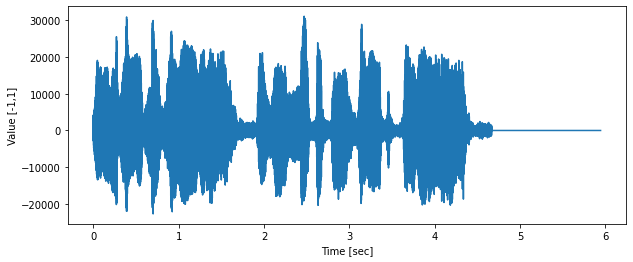

In [75]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

r_ref_path="./vocals/umberella/r_ref.wav"
#ファイルを読み込む
r_wav=wave.open(r_ref_path)

#ファイルの情報を出力する
print("サンプリング周波数[Hz]: ",r_wav.getframerate()) 
print("サンプルサイズ[Byte]: ", r_wav.getsampwidth())
print("サンプル数: ",r_wav.getnframes()) 
print("チャンネル数: ",r_wav.getnchannels()) 

#PCM形式の波形データを読み込み
data=r_wav.readframes(r_wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
# data=data/np.iinfo(np.int16).max
print("data.shape:",data.shape)
r_wav.close()

#x軸の値
x=np.array(range(r_wav.getnframes()))/r_wav.getframerate()
# print("wav.getnframes():",wav.getnframes())
# print("wav.getframerate():",wav.getframerate())
# print("x.shape:",x.shape)

#音声データをプロットする
plt.figure(figsize=(10,4))
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1,1]")
plt.plot(x,data)
plt.show()

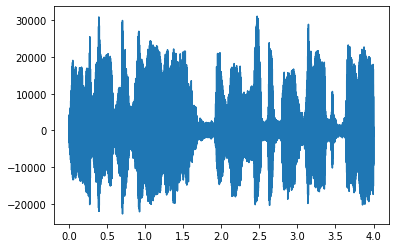

In [72]:
time = 4
r_x3=np.array(range(r_wav.getframerate()*time))/r_wav.getframerate()
r_data3 = data[:r_wav.getframerate()*time]

plt.plot(r_x3,r_data3)
plt.show()

In [24]:
# # 一回だけ実行

# # 4秒分に相当するフレーム数を算出
# time = 4
# r_ch = r_wav.getnchannels()
# r_width = r_wav.getsampwidth()
# r_fr = r_wav.getframerate()
# r_fn = r_wav.getnframes()

# frames = int(r_ch * r_fr * time)

# print("サンプリング周波数[Hz]: ",r_fr) 
# print("サンプルサイズ[Byte]: ", r_width)
# print("サンプル数: ",r_fn) 
# print("チャンネル数: ",r_ch)

# # 出力データを生成
# r_path3 = "./vocals/umberella/r_ref3.wav"

# outd = struct.pack("h" * len(r_data3),* r_data3)

# # 書き出し
# ww = wave.open(r_path3, 'w')
# ww.setnchannels(r_ch)
# ww.setsampwidth(r_width)
# ww.setframerate(r_fr)
# ww.writeframes(outd)
# ww.close()

サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  262144
チャンネル数:  1


In [79]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

#ファイルの読み込み
sample_wave_file="./vocals/umberella/t_ref.wav"
wav=wave.open(sample_wave_file)
data=wav.readframes(wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
print("data.shape:",data.shape)

#dataを再生する
sd.play(data,wav.getframerate())
print("再生開始")
#再生が終わるまで待つ
status = sd.wait()

data.shape: (131072,)
再生開始


サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  131072
チャンネル数:  1
data.shape: (131072,)


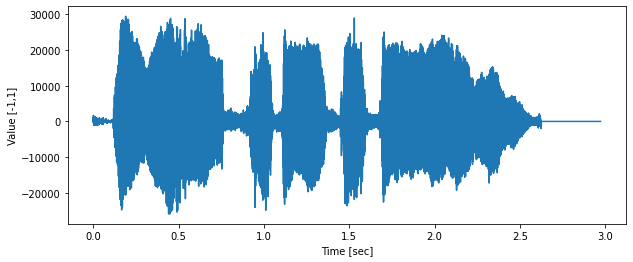

In [80]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

t_ref_path="./vocals/umberella/t_ref.wav"
#ファイルを読み込む
t_wav=wave.open(t_ref_path)

#ファイルの情報を出力する
print("サンプリング周波数[Hz]: ",t_wav.getframerate()) 
print("サンプルサイズ[Byte]: ", t_wav.getsampwidth())
print("サンプル数: ",t_wav.getnframes()) 
print("チャンネル数: ",t_wav.getnchannels()) 

#PCM形式の波形データを読み込み
data=t_wav.readframes(t_wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
# data=data/np.iinfo(np.int16).max
print("data.shape:",data.shape)
t_wav.close()

#x軸の値
x=np.array(range(t_wav.getnframes()))/t_wav.getframerate()
# print("wav.getnframes():",wav.getnframes())
# print("wav.getframerate():",wav.getframerate())
# print("x.shape:",x.shape)

#音声データをプロットする
plt.figure(figsize=(10,4))
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1,1]")
plt.plot(x,data)
plt.show()

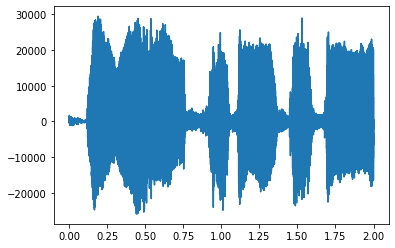

In [66]:
time =2
t_x3=np.array(range(t_wav.getframerate()*time))/t_wav.getframerate()
t_data3 = data[:t_wav.getframerate()*time]

plt.plot(t_x3,t_data3)
plt.show()

In [63]:
# # 一回だけ実行

# # 4秒分に相当するフレーム数を算出
# time = 2
# t_ch = t_wav.getnchannels()
# t_width = t_wav.getsampwidth()
# t_fr = t_wav.getframerate()
# t_fn = t_wav.getnframes()

# frames = int(t_ch * t_fr * time)

# print("サンプリング周波数[Hz]: ",t_fr) 
# print("サンプルサイズ[Byte]: ", t_width)
# print("サンプル数: ",t_fn) 
# print("チャンネル数: ",t_ch)

# # 出力データを生成
# t_path3 = "./vocals/umberella/t_ref3.wav"

# outd = struct.pack("h" * len(t_data3),* t_data3)

# # 書き出し
# ww = wave.open(t_path3, 'w')
# ww.setnchannels(t_ch)
# ww.setsampwidth(t_width)
# ww.setframerate(t_fr)
# ww.writeframes(outd)
# ww.close()

サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  131072
チャンネル数:  1


### test データ

In [93]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

#ファイルの読み込み
sample_wave_file="./vocals/umberella/r_test.wav"
wav=wave.open(sample_wave_file)
data=wav.readframes(wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
print("data.shape:",data.shape)

#dataを再生する
sd.play(data,wav.getframerate())
print("再生開始")
#再生が終わるまで待つ
status = sd.wait()

data.shape: (196608,)
再生開始


サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  196608
チャンネル数:  1
data.shape: (196608,)


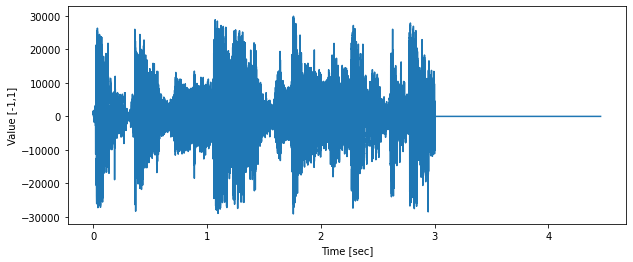

In [92]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

r_test_path="./vocals/umberella/r_test.wav"
#ファイルを読み込む
r_wav=wave.open(r_test_path)

#ファイルの情報を出力する
print("サンプリング周波数[Hz]: ",r_wav.getframerate()) 
print("サンプルサイズ[Byte]: ", r_wav.getsampwidth())
print("サンプル数: ",r_wav.getnframes()) 
print("チャンネル数: ",r_wav.getnchannels()) 

#PCM形式の波形データを読み込み
data=r_wav.readframes(r_wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
# data=data/np.iinfo(np.int16).max
print("data.shape:",data.shape)
r_wav.close()

#x軸の値
x=np.array(range(r_wav.getnframes()))/r_wav.getframerate()
# print("wav.getnframes():",wav.getnframes())
# print("wav.getframerate():",wav.getframerate())
# print("x.shape:",x.shape)

#音声データをプロットする
plt.figure(figsize=(10,4))
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1,1]")
plt.plot(x,data)
plt.show()

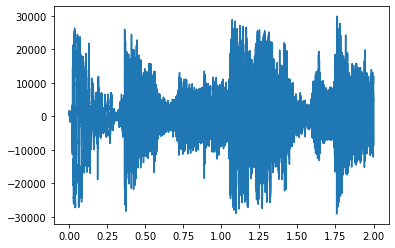

In [91]:
time = 2
r_x3=np.array(range(r_wav.getframerate()*time))/r_wav.getframerate()
r_data3 = data[:r_wav.getframerate()*time]

plt.plot(r_x3,r_data3)
plt.show()

In [88]:
# # 一回だけ実行

# # 4秒分に相当するフレーム数を算出
# time = 2
# r_ch = r_wav.getnchannels()
# r_width = r_wav.getsampwidth()
# r_fr = r_wav.getframerate()
# r_fn = r_wav.getnframes()

# frames = int(r_ch * r_fr * time)

# print("サンプリング周波数[Hz]: ",r_fr) 
# print("サンプルサイズ[Byte]: ", r_width)
# print("サンプル数: ",r_fn) 
# print("チャンネル数: ",r_ch)

# # 出力データを生成
# r_path3 = "./vocals/umberella/r_test3.wav"

# outd = struct.pack("h" * len(r_data3),* r_data3)

# # 書き出し
# ww = wave.open(r_path3, 'w')
# ww.setnchannels(r_ch)
# ww.setsampwidth(r_width)
# ww.setframerate(r_fr)
# ww.writeframes(outd)
# ww.close()

サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  196608
チャンネル数:  1


In [114]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

#ファイルの読み込み
sample_wave_file="./vocals/umberella/t_test.wav"
wav=wave.open(sample_wave_file)
data=wav.readframes(wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
print("data.shape:",data.shape)

#dataを再生する
sd.play(data,wav.getframerate())
print("再生開始")
#再生が終わるまで待つ
status = sd.wait()

data.shape: (196608,)
再生開始


サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  196608
チャンネル数:  1
data.shape: (196608,)


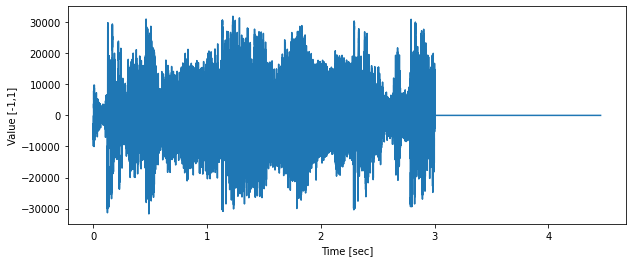

In [115]:
import wave as wave
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

t_test_path="./vocals/umberella/t_test.wav"
#ファイルを読み込む
t_wav=wave.open(t_test_path)

#ファイルの情報を出力する
print("サンプリング周波数[Hz]: ",t_wav.getframerate()) 
print("サンプルサイズ[Byte]: ", t_wav.getsampwidth())
print("サンプル数: ",t_wav.getnframes()) 
print("チャンネル数: ",t_wav.getnchannels()) 

#PCM形式の波形データを読み込み
data=t_wav.readframes(t_wav.getnframes())
data=np.frombuffer(data, dtype=np.int16)
# data=data/np.iinfo(np.int16).max
print("data.shape:",data.shape)
t_wav.close()

#x軸の値
x=np.array(range(t_wav.getnframes()))/t_wav.getframerate()
# print("wav.getnframes():",wav.getnframes())
# print("wav.getframerate():",wav.getframerate())
# print("x.shape:",x.shape)

#音声データをプロットする
plt.figure(figsize=(10,4))
plt.xlabel("Time [sec]")
plt.ylabel("Value [-1,1]")
plt.plot(x,data)
plt.show()

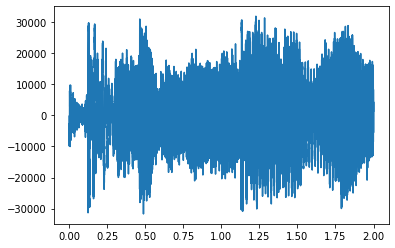

In [113]:
time =2
t_x3=np.array(range(t_wav.getframerate()*time))/t_wav.getframerate()
t_data3 = data[:t_wav.getframerate()*time]

plt.plot(t_x3,t_data3)
plt.show()

In [107]:
# # 一回だけ実行

# # 4秒分に相当するフレーム数を算出
# time = 2
# t_ch = t_wav.getnchannels()
# t_width = t_wav.getsampwidth()
# t_fr = t_wav.getframerate()
# t_fn = t_wav.getnframes()

# frames = int(t_ch * t_fr * time)

# print("サンプリング周波数[Hz]: ",t_fr) 
# print("サンプルサイズ[Byte]: ", t_width)
# print("サンプル数: ",t_fn) 
# print("チャンネル数: ",t_ch)

# # 出力データを生成
# t_path3 = "./vocals/umberella/t_test3.wav"

# outd = struct.pack("h" * len(t_data3),* t_data3)

# # 書き出し
# ww = wave.open(t_path3, 'w')
# ww.setnchannels(t_ch)
# ww.setsampwidth(t_width)
# ww.setframerate(t_fr)
# ww.writeframes(outd)
# ww.close()

サンプリング周波数[Hz]:  44100
サンプルサイズ[Byte]:  2
サンプル数:  196608
チャンネル数:  1
